In [1]:
import pandas as pd
import numpy as np
import os 
import re # Regular Expressions library
import matplotlib.pyplot as plt 

subject = '02'
session = '2_raw_data_14-21_22.03.16'
raw_data = pd.read_csv(
    r"C:\Users\dholl\OneDrive\Documents\COMP 6630\Final Project\EMG_data_for_gestures-master\EMG_data_for_gestures-master\07\1_raw_data_18-48_22.03.16.txt")
raw_file = open(r"C:\Users\dholl\OneDrive\Documents\COMP 6630\Final Project\EMG_data_for_gestures-master\EMG_data_for_gestures-master\07\1_raw_data_18-48_22.03.16.txt","r")

data = raw_file.readlines()
data = [col.split('\t') for col in data]
data[1:] # Capture data and dismiss header info
data_df = pd.DataFrame(data)
columns = data[0]
data_df.columns = columns

# Remove "\n" in the final column
def cleaner(txt):
    txt = re.sub(r'[\n]+','', txt)
    return txt
# Apply cleaner function to last column header
data_df = data_df.rename(columns = {'class\n' : 'class'} )
# Apply cleaner function to last column values 
data_df['class'] = data_df['class'].apply(lambda p: cleaner(p))
data_df = data_df.iloc[1:] # Remove first header row
data_df = data_df.astype(str).astype(float)

# Format Data: Split into attrubutes and class labels
X = data_df.iloc[1:,:-1]
y = data_df['class']
time = data_df.iloc[:, 0]
channel1 = data_df.iloc[:, 1]
channel2 = data_df.iloc[:,2]
channel3 = data_df.iloc[:, 3]
channel4 = data_df.iloc[:,4]
channel5 = data_df.iloc[:, 5]
channel6 = data_df.iloc[:,6]
channel7 = data_df.iloc[:, 7]
channel8 = data_df.iloc[:,8]
Class = data_df.iloc[:,9]
unmarked_idx = np.where(data_df['class'] == 0)
rest_idx = np.where(data_df['class'] == 1)
clenched_idx = np.where(data_df['class'] == 2)
flexion_idx = np.where(data_df['class'] == 3)
extension_idx = np.where(data_df['class'] == 4)
rdev_idx = np.where(data_df['class'] == 5)
udev_idx = np.where(data_df['class'] == 6)
extend_palm_idx = np.where(data_df['class'] == 7)

for i in range(len(unmarked_idx)):
    Class_rest = Class[unmarked_idx[i] + 1]
for i in range(len(rest_idx)):
    Class_rest = Class[rest_idx[i] + 1]
for i in range(len(clenched_idx)):
    Class_clenched = Class[clenched_idx[i] + 1 ]    
for i in range(len(flexion_idx)):
    Class_flexion = Class[flexion_idx[i] + 1]    
for i in range(len(extension_idx)):
    Class_extension = Class[extension_idx[i] +1]      
for i in range(len(rdev_idx)):
    Class_rdev = Class[rdev_idx[i] +1]  
for i in range(len(udev_idx)):
    Class_udev = Class[udev_idx[i] +1]        
for i in range(len(extend_palm_idx)):
    Class_extend_palm = Class[extend_palm_idx[i] + 1] 
    

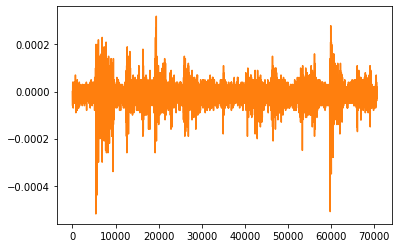

In [2]:
#fig, axs = plt.subplots(2, 4)
#axs[0, 0].plot(time, channel1)
plt.plot(time, channel2, 'tab:orange')
#plt.plot(time, channel3, 'tab:green')
#plt.plot(time, channel4,'tab:gray')
#axs[1, 0].plot(time, channel5,'pink')
#axs[1, 1].plot(time, channel6, 'tab:purple')
#axs[1, 2].plot(time, channel7, 'tab:cyan')
#axs[1, 3].plot(time, channel8, 'tab:gray')
#for i in range(2):
#    for j in range(4):
#        axs[i, j].set_title('Channel #%s' %str(i*4 + j + 1))
#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')
# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()
#plt.legend()

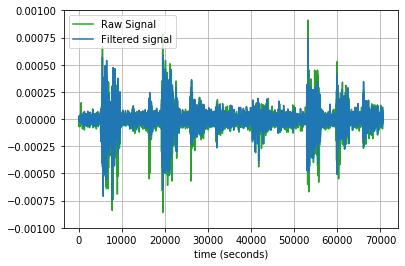

In [3]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 10000.0
    lowcut = 20.0
    highcut = 500.0
    T = 0.05
    a = 0.02
    filtered_channel1 = butter_bandpass_filter(channel1, lowcut, highcut, fs, order=2)
    filtered_channel2 = butter_bandpass_filter(channel2, lowcut, highcut, fs, order=2)
    filtered_channel3 = butter_bandpass_filter(channel3, lowcut, highcut, fs, order=2)
    filtered_channel4 = butter_bandpass_filter(channel4, lowcut, highcut, fs, order=2)
    filtered_channel5 = butter_bandpass_filter(channel5, lowcut, highcut, fs, order=2)
    filtered_channel6 = butter_bandpass_filter(channel6, lowcut, highcut, fs, order=2)
    filtered_channel7 = butter_bandpass_filter(channel7, lowcut, highcut, fs, order=2)
    filtered_channel8 = butter_bandpass_filter(channel8, lowcut, highcut, fs, order=2)

    #ig, axs = plt.subplots(2, 4)
   # axs[0, 0].plot(time, channel1, 'tab:blue')
   # axs[0, 1].plot(time, channel2, 'tab:orange')
    plt.plot(time, channel3, 'tab:green',label = 'Raw Signal')
   # axs[0, 3].plot(time, channel4, 'tab:red')
    #axs[1, 0].plot(time, channel5,'pink')
   # axs[1, 1].plot(time, channel6, 'tab:purple')
   # axs[1, 2].plot(time, channel7, 'tab:cyan')
   #axs[1, 3].plot(time, channel8, 'tab:gray')
    #axs[0,0].plot(time, filtered_channel1, label='Filtered signal (%g Hz)')
    #axs[0,1].plot(time, filtered_channel2, label='Filtered signal (%g Hz)')
    plt.plot(time, filtered_channel3, label='Filtered signal')
    #axs[0,3].plot(time, filtered_channel4, label='Filtered signal (%g Hz)')
    #axs[1,0].plot(time, filtered_channel5, label='Filtered signal (%g Hz)')
    #axs[1,1].plot(time, filtered_channel6, label='Filtered signal (%g Hz)')
    #axs[1,2].plot(time, filtered_channel7, label='Filtered signal (%g Hz)')
    #axs[1,3].plot(time, filtered_channel8, label='Filtered signal (%g Hz)')

    
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')
    plt.ylim(-0.001,0.001)
    
    plt.show()
run()

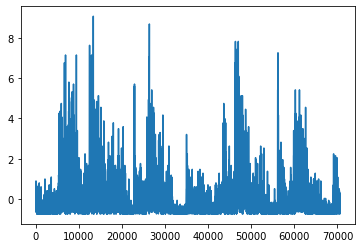

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X = abs(X)
X_scaled = preprocessing.StandardScaler().fit_transform(X)
time = time.iloc[:-1]

#fig, axs = plt.subplots(2, 4)
plt.plot(time, X_scaled[:,1])
#axs[0, 1].plot(time, X_scaled[:,2], 'tab:orange')
#axs[0, 2].plot(time, X_scaled[:,3], 'tab:green')
#axs[0, 3].plot(time, X_scaled[:,4], 'tab:red')
#axs[1, 0].plot(time, X_scaled[:,5],'pink')
#axs[1, 1].plot(time, X_scaled[:,6], 'tab:purple')
#axs[1, 2].plot(time, X_scaled[:,7], 'tab:cyan')
#axs[1, 3].plot(time, X_scaled[:,8], 'tab:gray')

#for i in range(2):
#    for j in range(4):
#        axs[i, j].set_title('Channel #%s' %str(i*4 + j + 1))
#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()
   
#plt.legend()
y = y.iloc[:-1]

[[8640    0   60    0    0    0  250]
 [ 757    0    0    0    0    0    0]
 [ 727    0   42    0    0    0    0]
 [ 776    0    6    0    0    0    0]
 [ 688    0    0    0    0    0  139]
 [ 820    0    0    0    0    0    3]
 [ 590    0    0    0    0    0  242]]
Accuracy using LDA with Logistic Regression: 0.649490538573508
[[8647    0    0    0    0    0  303]
 [ 757    0    0    0    0    0    0]
 [ 769    0    0    0    0    0    0]
 [ 774    0    0    0    0    0    8]
 [ 637    0    0    0    0    0  190]
 [ 820    0    0    0    0    0    3]
 [ 513    0    0    0    0    0  319]]
Accuracy using Random Forest Classifier: 0.65254730713246
Confusion matrix, without normalization
[[8640    0   60    0    0    0  250]
 [ 757    0    0    0    0    0    0]
 [ 727    0   42    0    0    0    0]
 [ 776    0    6    0    0    0    0]
 [ 688    0    0    0    0    0  139]
 [ 820    0    0    0    0    0    3]
 [ 590    0    0    0    0    0  242]]
Normalized confusion matrix
[[0.965363

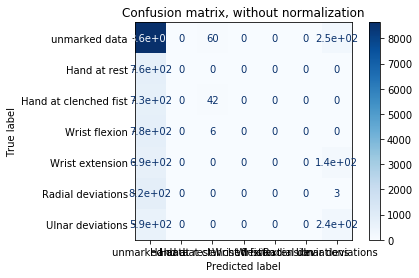

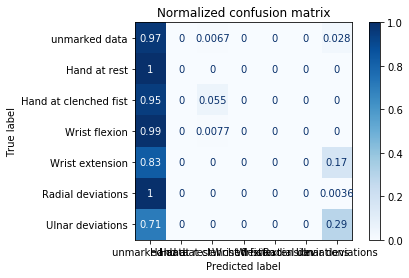

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)
lda = LDA(n_components = 1) # number of linear discriminants (n=1 for a single linear discriminant)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Compare LDA to PCA in Random Forest algorithm
classifier_lda = LogisticRegression().fit(X_train, y_train)
classifier_randomforest = RandomForestClassifier(max_depth = 2, random_state =0)
classifier_randomforest.fit(X_train, y_train)

lda_pred = classifier_lda.predict(X_test)
randomforest_pred = classifier_randomforest.predict(X_test)

# Evaluate performance
lda_cm = confusion_matrix(y_test, lda_pred)
randomforest_cm = confusion_matrix(y_test, randomforest_pred)

print(lda_cm)
print('Accuracy using LDA with Logistic Regression: ' + str(accuracy_score(y_test, lda_pred)))
print(randomforest_cm)
print('Accuracy using Random Forest Classifier: ' + str(accuracy_score(y_test, randomforest_pred)))

# -----------------------------------------------
class_names =  ['unmarked data', 'Hand at rest','Hand at clenched fist','Wrist flexion','Wrist extension','Radial deviations','Ulnar deviations', 'Extended palm (not performed by all subjects)']

# Plot confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier_lda, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [6]:
from sklearn.metrics import precision_score, recall_score, classification_report
num_true_pred_class0 = 0
num_true_pred_class1 = 0
num_true_pred_class2 = 0
num_true_pred_class3 = 0
num_true_pred_class4 = 0
num_true_pred_class5 = 0
num_true_pred_class6 = 0
num_true_pred_class7 = 0

for i in range(len(lda_pred)):
    if lda_pred[i] == y_test.values[i]:
            if lda_pred[i] == 0:
                num_true_pred_class0 +=1
            if lda_pred[i] == 1:
                num_true_pred_class1 +=1
            if lda_pred[i] == 2:
                num_true_pred_class2 +=1
            if lda_pred[i] == 3:
                num_true_pred_class3 +=1
            if lda_pred[i] == 4:
                num_true_pred_class4 +=1
            if lda_pred[i] == 5:
                num_true_pred_class5 +=1
            if lda_pred[i] == 6:
                num_true_pred_class6 +=1
            if lda_pred[i] == 7:
                num_true_pred_class7 +=1   
            
num_true_class0 = np.sum(y_test.values == 0)
num_true_class1 = np.sum(y_test.values == 1)
num_true_class2 = np.sum(y_test.values == 2)
num_true_class3 = np.sum(y_test.values == 3)
num_true_class4 = np.sum(y_test.values == 4)
num_true_class5 = np.sum(y_test.values == 5)
num_true_class6 = np.sum(y_test.values == 6)
num_true_class7 = np.sum(y_test.values == 7)

accuracy_class0 = num_true_pred_class0 / num_true_class0
accuracy_class1 = num_true_pred_class1 / num_true_class1
accuracy_class2 = num_true_pred_class2 / num_true_class2
accuracy_class3 = num_true_pred_class3 / num_true_class3
accuracy_class4 = num_true_pred_class4 / num_true_class4
accuracy_class5 = num_true_pred_class5 / num_true_class5
accuracy_class6 = num_true_pred_class6 / num_true_class6
accuracy_class7 = num_true_pred_class7 / num_true_class7

#if y_test.values == 0:
print('Num of Class0 Predictions: ', num_true_pred_class0, 'Out of Actual Class0: ', num_true_class0, 'Accuracy=', accuracy_class0)
print('Num of Class1 Predictions: ', num_true_pred_class1, 'Out of Actual Class1: ', num_true_class1, 'Accuracy=', accuracy_class1)
print('Num of Class2 Predictions: ', num_true_pred_class2, 'Out of Actual Class2: ', num_true_class2, 'Accuracy=', accuracy_class2)
print('Num of Class3 Predictions: ', num_true_pred_class3, 'Out of Actual Class3: ', num_true_class3, 'Accuracy=', accuracy_class3)
print('Num of Class4 Predictions: ', num_true_pred_class4, 'Out of Actual Class4: ', num_true_class4, 'Accuracy=', accuracy_class4)
print('Num of Class5 Predictions: ', num_true_pred_class5, 'Out of Actual Class5: ', num_true_class5, 'Accuracy=', accuracy_class5)
print('Num of Class6 Predictions: ', num_true_pred_class6, 'Out of Actual Class6: ', num_true_class6, 'Accuracy=', accuracy_class6)
print('Num of Class7 Predictions: ', num_true_pred_class7, 'Out of Actual Class7: ', num_true_class7, 'Accuracy=', accuracy_class7)


Num of Class0 Predictions:  8640 Out of Actual Class0:  8950 Accuracy= 0.9653631284916201
Num of Class1 Predictions:  0 Out of Actual Class1:  757 Accuracy= 0.0
Num of Class2 Predictions:  42 Out of Actual Class2:  769 Accuracy= 0.054616384915474644
Num of Class3 Predictions:  0 Out of Actual Class3:  782 Accuracy= 0.0
Num of Class4 Predictions:  0 Out of Actual Class4:  827 Accuracy= 0.0
Num of Class5 Predictions:  0 Out of Actual Class5:  823 Accuracy= 0.0
Num of Class6 Predictions:  242 Out of Actual Class6:  832 Accuracy= 0.29086538461538464
Num of Class7 Predictions:  0 Out of Actual Class7:  0 Accuracy= nan


C:\Users\dholl\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in long_scalars


In [ ]:
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)

clf = svm.SVC(kernel='poly', degree=8)
clf.fit(X_train, y_train)
predict_svm = clf.predict(X_test)

num_true_pred_class0 = 0
num_true_pred_class1 = 0
num_true_pred_class2 = 0
num_true_pred_class3 = 0
num_true_pred_class4 = 0
num_true_pred_class5 = 0
num_true_pred_class6 = 0
num_true_pred_class7 = 0

for i in range(len(predict_svm)):
    if predict_svm[i] == y_test.values[i]:
            if predict_svm[i] == 0:
                num_true_pred_class0 +=1
            if predict_svm[i] == 1:
                num_true_pred_class1 +=1
            if predict_svm[i] == 2:
                num_true_pred_class2 +=1
            if predict_svm[i] == 3:
                num_true_pred_class3 +=1
            if predict_svm[i] == 4:
                num_true_pred_class4 +=1
            if predict_svm[i] == 5:
                num_true_pred_class5 +=1
            if predict_svm[i] == 6:
                num_true_pred_class6 +=1
            if predict_svm[i] == 7:
                num_true_pred_class7 +=1   
            
num_true_class0 = np.sum(y_test.values == 0)
num_true_class1 = np.sum(y_test.values == 1)
num_true_class2 = np.sum(y_test.values == 2)
num_true_class3 = np.sum(y_test.values == 3)
num_true_class4 = np.sum(y_test.values == 4)
num_true_class5 = np.sum(y_test.values == 5)
num_true_class6 = np.sum(y_test.values == 6)
num_true_class7 = np.sum(y_test.values == 7)

accuracy_class0 = num_true_pred_class0 / num_true_class0
accuracy_class1 = num_true_pred_class1 / num_true_class1
accuracy_class2 = num_true_pred_class2 / num_true_class2
accuracy_class3 = num_true_pred_class3 / num_true_class3
accuracy_class4 = num_true_pred_class4 / num_true_class4
accuracy_class5 = num_true_pred_class5 / num_true_class5
accuracy_class6 = num_true_pred_class6 / num_true_class6
accuracy_class7 = num_true_pred_class7 / num_true_class7

#if y_test.values == 0:
print('Num of Class0 Predictions: ', num_true_pred_class0, 'Out of Actual Class0: ', num_true_class0, 'Accuracy=', accuracy_class0)
print('Num of Class1 Predictions: ', num_true_pred_class1, 'Out of Actual Class1: ', num_true_class1, 'Accuracy=', accuracy_class1)
print('Num of Class2 Predictions: ', num_true_pred_class2, 'Out of Actual Class2: ', num_true_class2, 'Accuracy=', accuracy_class2)
print('Num of Class3 Predictions: ', num_true_pred_class3, 'Out of Actual Class3: ', num_true_class3, 'Accuracy=', accuracy_class3)
print('Num of Class4 Predictions: ', num_true_pred_class4, 'Out of Actual Class4: ', num_true_class4, 'Accuracy=', accuracy_class4)
print('Num of Class5 Predictions: ', num_true_pred_class5, 'Out of Actual Class5: ', num_true_class5, 'Accuracy=', accuracy_class5)
print('Num of Class6 Predictions: ', num_true_pred_class6, 'Out of Actual Class6: ', num_true_class6, 'Accuracy=', accuracy_class6)
print('Num of Class7 Predictions: ', num_true_pred_class7, 'Out of Actual Class7: ', num_true_class7, 'Accuracy=', accuracy_class7)
print('Total Accuracy using SVM: ' + str(accuracy_score(y_test, predict_svm)))


In [8]:
unmarked_idx = np.where(data_df['class'] == 0)
rest_idx = np.where(data_df['class'] == 1)
clenched_idx = np.where(data_df['class'] == 2)
flexion_idx = np.where(data_df['class'] == 3)
extension_idx = np.where(data_df['class'] == 4)
rdev_idx = np.where(data_df['class'] == 5)
udev_idx = np.where(data_df['class'] == 6)
extend_palm_idx = np.where(data_df['class'] == 7)

# Partition each class to a single array, for 8 EMG channels
class1_data = np.squeeze(X_scaled[rest_idx, 1:9].tolist())
class2_data = np.squeeze(X_scaled[clenched_idx,1:9].tolist())
class3_data = np.squeeze(X_scaled[flexion_idx,1:9].tolist())
class4_data = np.squeeze(X_scaled[extension_idx, 1:9].tolist())
class5_data = np.squeeze(X_scaled[rdev_idx, 1:9].tolist())
class6_data = np.squeeze(X_scaled[udev_idx, 1:9].tolist())
class7_data = np.squeeze(X_scaled[extend_palm_idx, 1:9].tolist())

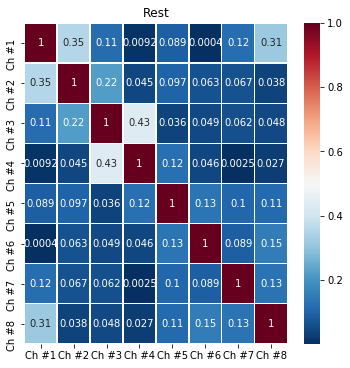

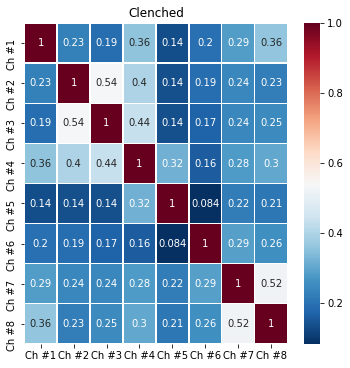

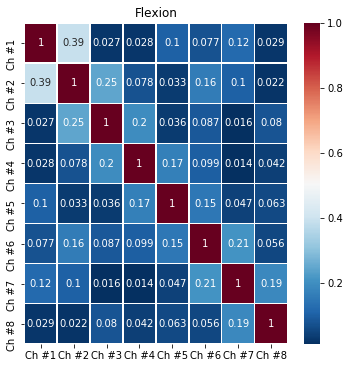

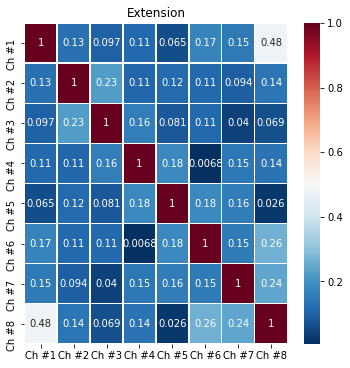

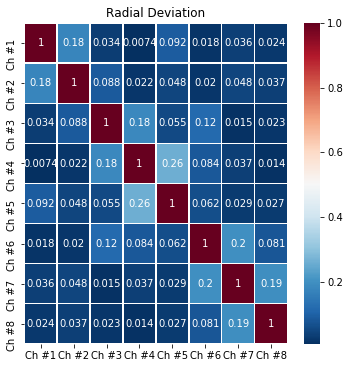

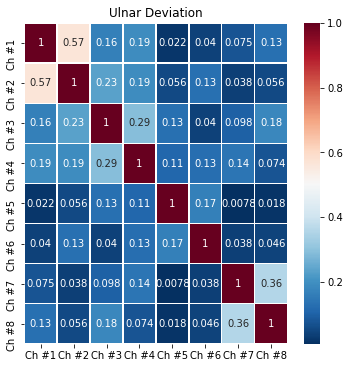

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

class_=[class1_data, class2_data, class3_data, class4_data, class5_data, class6_data]    
columns = ['Ch #1', 'Ch #2', 'Ch #3', 'Ch #4', 'Ch #5', 'Ch #6', 'Ch #7', 'Ch #8']
movement_type = ['Rest', 'Clenched', 'Flexion', 'Extension', 'Radial Deviation', 'Ulnar Deviation']
# Find redundant feature channels for class1 (Hand at Rest)
for i in range(len(class_)):    
    X_scaled_table = pd.DataFrame(class_[i])
    X_scaled_table.columns = columns
    pearsoncorr = X_scaled_table.corr('pearson')
    plt.figure(figsize=(5.9,5.9))
    sns_plot = sns.heatmap(abs(pearsoncorr),
               xticklabels=pearsoncorr.columns,
               yticklabels=pearsoncorr.columns,
               cmap='RdBu_r',
               annot=True,
               linewidth=0.5)
    plt.title(str(movement_type[i]))